In [36]:
import os 
import numpy as np 
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
base_path = r"C:\Users\USER\OneDrive - Fondation EPF\Desktop\Sandman Project\Datasets\1\OD"


# Explorer la hiérarchie
for day in os.listdir(base_path):
    day_path = os.path.join(base_path, day)
    if os.path.isdir(day_path):
        print("Jour :", day)
        for file in os.listdir(day_path):
            if file.endswith(".mat"):
                print("   ", file)

Jour : post_trial1_2017-09-21_11-06-43
    HPC_100_CH46.continuous.mat
    PFC_100_CH11.continuous.mat
    post_trial1_2017-09-21_11-06-43-states.mat
Jour : post_trial2_2017-09-21_11-57-34
    HPC_100_CH46.continuous.mat
    PFC_100_CH11.continuous.mat
    post_trial2_2017-09-21_11-57-34-states.mat
Jour : post_trial3_2017-09-21_12-48-10
    HPC_100_CH46.continuous.mat
    PFC_100_CH11.continuous.mat
    post_trial3_2017-09-21_12-48-10-states.mat
Jour : post_trial4_2017-09-21_13-40-22
    HPC_100_CH46.continuous.mat
    PFC_100_CH11.continuous.mat
    post_trial4_2017-09-21_13-40-22-states.mat
Jour : post_trial5_2017-09-21_14-31-51
    HPC_100_CH46.continuous.mat
    PFC_100_CH11.continuous.mat
    post_trial5_2017-09-21_14-31-51-states.mat
Jour : presleep_2017-09-21_10-12-40
    HPC_100_CH46.continuous.mat
    PFC_100_CH11.continuous.mat
    presleep_2017-09-21_10-12-40-states.mat


In [61]:
mat_file = os.path.join(base_path, "post_trial1_2017-09-21_11-06-43\\HPC_100_CH46.continuous.mat")
dataHPC = sio.loadmat(mat_file)

print(dataHPC.keys())  # Voir les variables contenues

dict_keys(['__header__', '__version__', '__globals__', 'HPC'])


In [62]:
mat_file = os.path.join(base_path, "post_trial1_2017-09-21_11-06-43\\PFC_100_CH11.continuous.mat")
dataPFC = sio.loadmat(mat_file)

print(dataPFC.keys())  # Voir les variables contenues

dict_keys(['__header__', '__version__', '__globals__', 'PFC'])


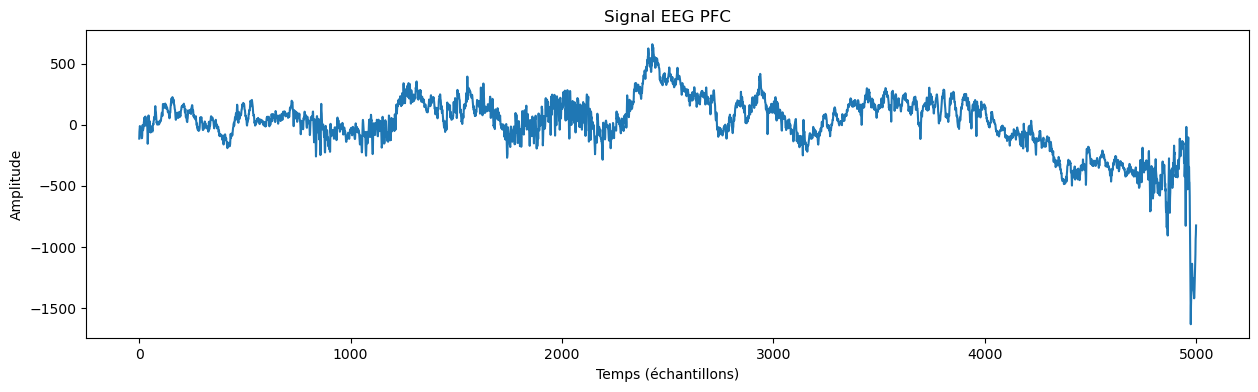

In [64]:
signal = dataPFC['PFC']   # dépend de la structure de ton fichier

plt.figure(figsize=(15,4))
plt.plot(signal[:5000])  # afficher 5000 points (~quelques secondes)
plt.title("Signal EEG PFC")
plt.xlabel("Temps (échantillons)")
plt.ylabel("Amplitude")
plt.show()


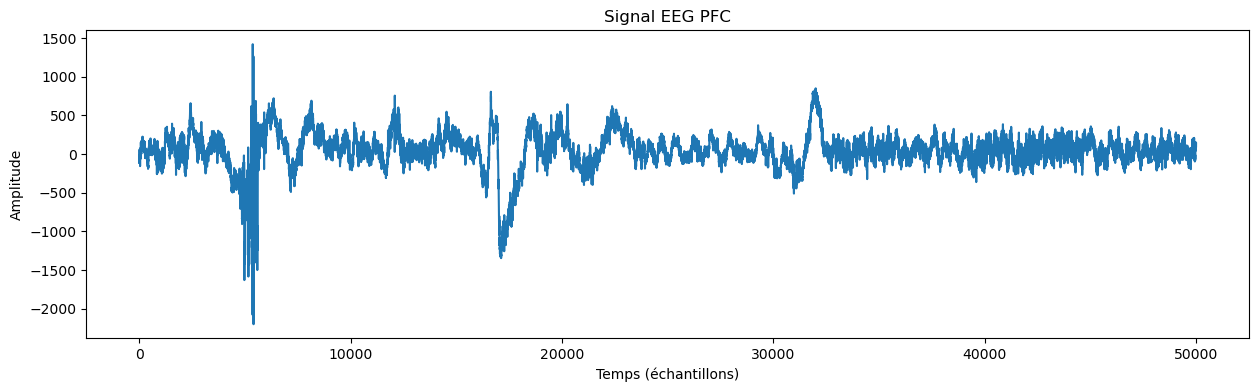

In [68]:
signal = dataPFC['PFC']   # dépend de la structure de ton fichier

plt.figure(figsize=(15,4))
plt.plot(signal[:50000])  # afficher 5000 points (~quelques secondes)
plt.title("Signal EEG PFC")
plt.xlabel("Temps (échantillons)")
plt.ylabel("Amplitude")
plt.show()

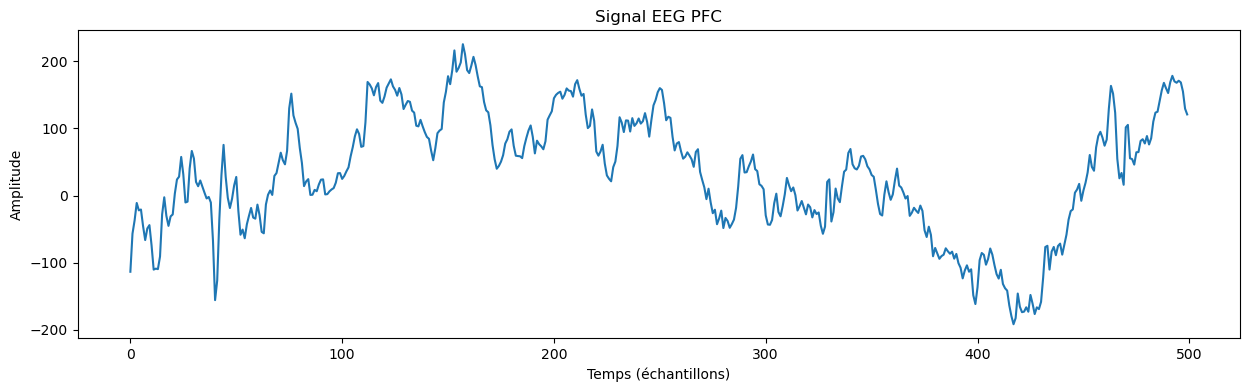

In [69]:
signal = dataPFC['PFC']   # dépend de la structure de ton fichier

plt.figure(figsize=(15,4))
plt.plot(signal[:500])  # afficher 5000 points (~quelques secondes)
plt.title("Signal EEG PFC")
plt.xlabel("Temps (échantillons)")
plt.ylabel("Amplitude")
plt.show()

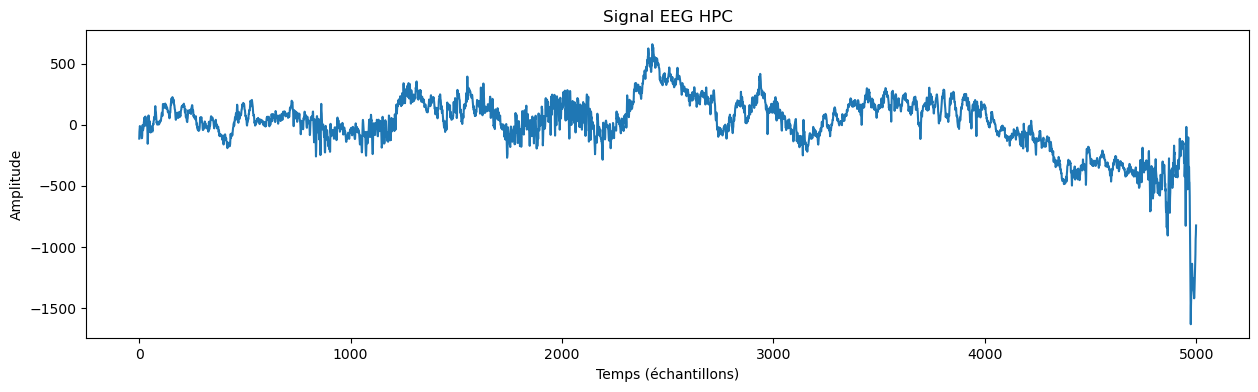

In [66]:
signal2 = dataHPC['HPC']   # dépend de la structure de ton fichier

plt.figure(figsize=(15,4))
plt.plot(signal[:5000])  # afficher 5000 points (~quelques secondes)
plt.title("Signal EEG HPC")
plt.xlabel("Temps (échantillons)")
plt.ylabel("Amplitude")
plt.show()

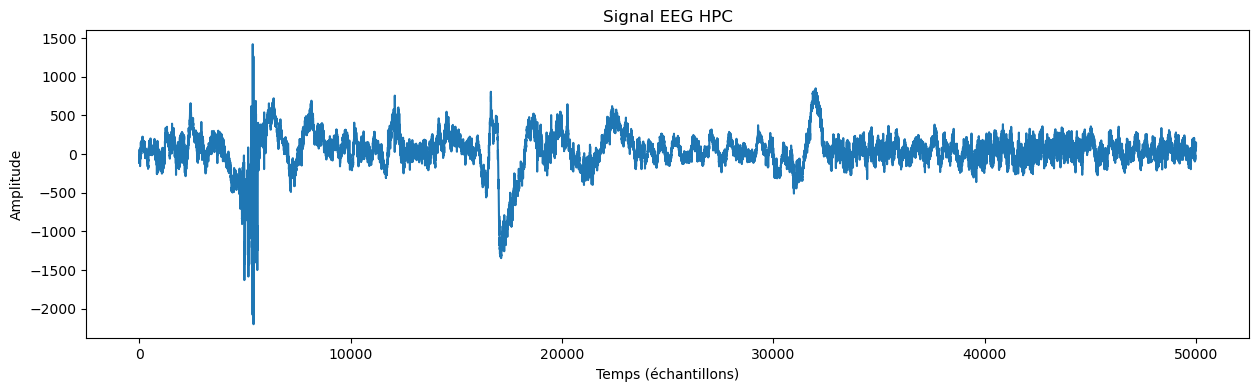

In [70]:
signal2 = dataHPC['HPC']   # dépend de la structure de ton fichier

plt.figure(figsize=(15,4))
plt.plot(signal[:50000])  # afficher 5000 points (~quelques secondes)
plt.title("Signal EEG HPC")
plt.xlabel("Temps (échantillons)")
plt.ylabel("Amplitude")
plt.show()

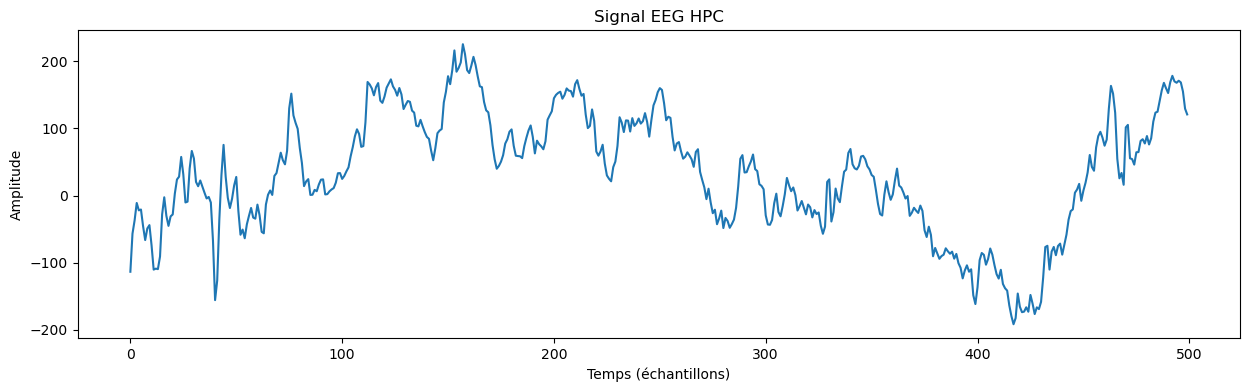

In [71]:
signal2 = dataHPC['HPC']   # dépend de la structure de ton fichier

plt.figure(figsize=(15,4))
plt.plot(signal[:500])  # afficher 5000 points (~quelques secondes)
plt.title("Signal EEG HPC")
plt.xlabel("Temps (échantillons)")
plt.ylabel("Amplitude")
plt.show()

In [67]:
import numpy as np

hpc = dataHPC['HPC'].squeeze()
pfc = dataPFC['PFC'].squeeze()

print("HPC shape:", hpc.shape)
print("PFC shape:", pfc.shape)
print("Identiques ?", np.array_equal(hpc, pfc))
print("Corrélation :", np.corrcoef(hpc[:10000], pfc[:10000])[0,1])


HPC shape: (6765568,)
PFC shape: (6765568,)
Identiques ? False
Corrélation : 0.4994177941307525


Même si ils semblent identiques visuellement, le HPC et PFC sont bien différents

### Visualisation spectrogramme

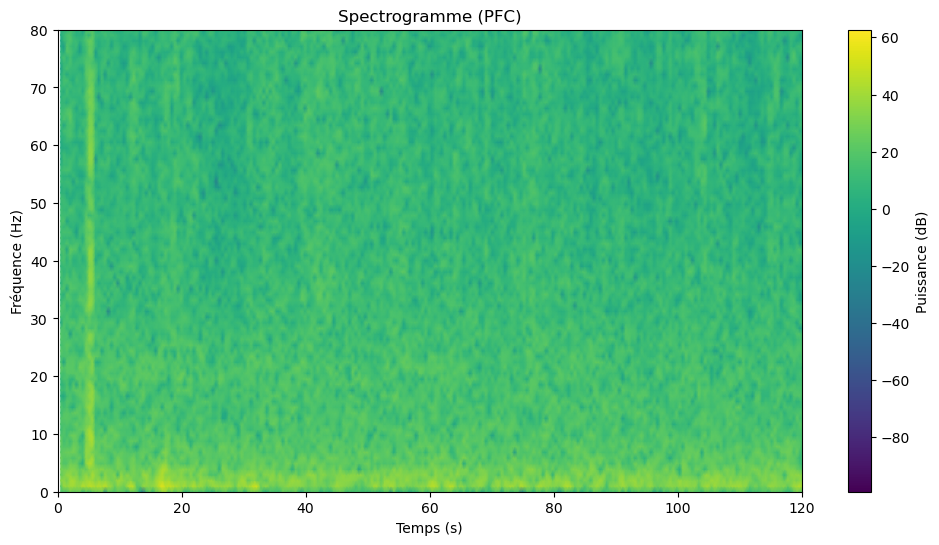

In [78]:
from scipy.signal import spectrogram
import numpy as np

signal = dataPFC['PFC'].squeeze()
fs = 1000  # à ajuster !

f, t, Sxx = spectrogram(signal, fs=fs, nperseg=1024, noverlap=512)

plt.figure(figsize=(12,6))
plt.pcolormesh(t, f, 10*np.log10(Sxx), shading='gouraud', cmap="viridis")
plt.colorbar(label="Puissance (dB)")
plt.ylabel("Fréquence (Hz)")
plt.xlabel("Temps (s)")
plt.ylim(0, 80)     # ne montrer que 0-80 Hz
plt.xlim(0, 120)
plt.title("Spectrogramme (PFC)")
plt.show()


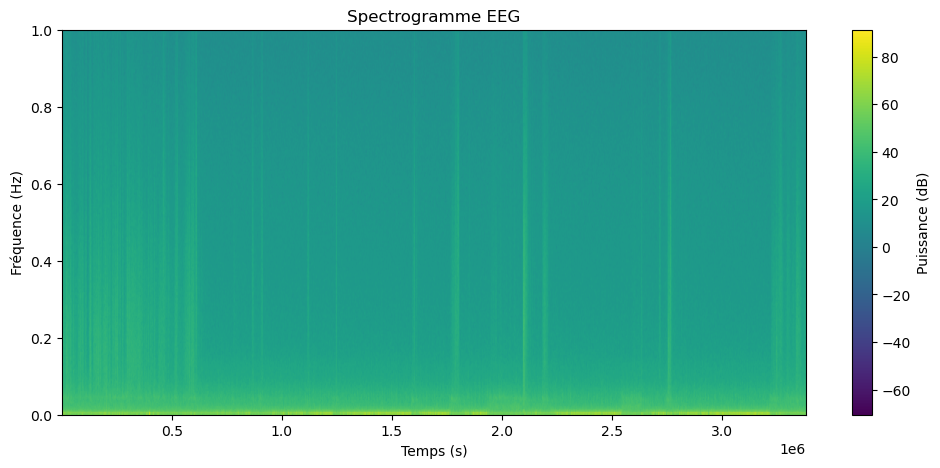

In [52]:
from matplotlib import mlab

plt.figure(figsize=(12,5))
plt.specgram(signal, NFFT=512, noverlap=256, cmap="viridis")
plt.colorbar(label="Puissance (dB)")
plt.xlabel("Temps (s)")
plt.ylabel("Fréquence (Hz)")
plt.title("Spectrogramme EEG")
plt.show()

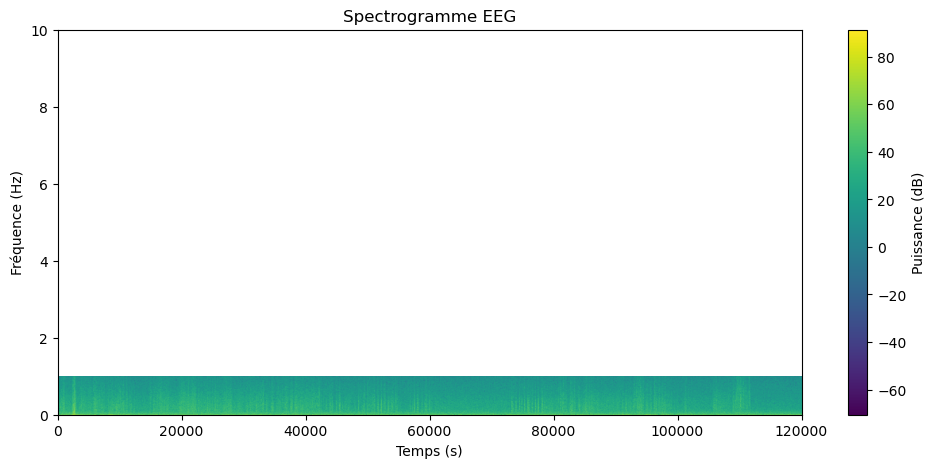

In [76]:
from matplotlib import mlab

plt.figure(figsize=(12,5))
plt.specgram(signal, NFFT=512, noverlap=256, cmap="viridis")
plt.colorbar(label="Puissance (dB)")
plt.xlabel("Temps (s)")
plt.ylabel("Fréquence (Hz)")
plt.ylim(0, 10)     # ne montrer que 0-80 Hz
plt.xlim(0, 120000)
plt.title("Spectrogramme EEG")
plt.show()
